<a href="https://colab.research.google.com/github/computational-neurology/workshop2025/blob/main/04_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fitting
As you have probably seen by now, it is not easy to determine which parameters give rise to the simulated timeseries just judging by the eye. We need some metrics to be sure of the similarity between empirical and simulated data. One example is to fit the simulated functional connectivity to the empirical functional connectivity by maximizing the correlation between the two matrices (this is just one way to fit)

In [2]:
%%capture
import sys
!{sys.executable} -m pip install git+https://github.com/neurolib-dev/neurolib.git
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install nilearn


# @title Run this to install dependencies

In [3]:
# Let's import all the relevant libraries
from neurolib.models.hopf import HopfModel

In [4]:
# The brain network dataset
from neurolib.utils.loadData import Dataset

# Some useful functions are provided here
import neurolib.utils.functions as func

In [5]:
ds = Dataset("hcp")

The Dataset class in neurolib allows you to load some resting-state fMRI BOLD series for 7 healthy subjects which you can access as:

In [6]:
len(ds.BOLDs)
ts = ds.BOLDs[0]

From this ts, start by plotting the functional connectivity.

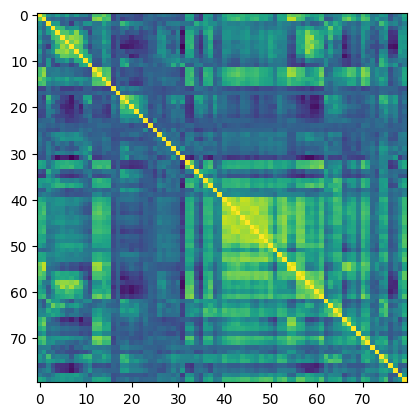

In [7]:
import matplotlib.pyplot as plt
# Your answer here:
fc_emp = func.fc(ts)
plt.imshow(fc_emp)

The Dataset class also has some precomputed structural connectivity and delay matrices:

In [8]:
sc = ds.Cmat
dc = ds.Dmat

Your first task is to find out a way to compare two matrices. You can check the documentation for neurolib func module to find some very useful functions for this scope! help(func). How similar are the fc and sc?

Use the structural and delay matrices above to set up your HopfModel, like we did in the previous lecture/homework

In [9]:
model = HopfModel(Cmat=sc, Dmat=dc)
# We set a short duration for the simulation for the purpose of the exercise. 
# if you want to simulate real data it should match the length of the scan
model.params.duration = 2 * 1000 
model.params["K_gl"] = 1.0

Now your task is to find the bifurcation parameter (a) that best reproduce the empirical FC. Don't overthink it for the moment. Just think about the easiest way you know to try several model parameters one after the other... You previously found out how to compare two matrices. So, you should run the model each time with a different parameter, calculate its functional connectivity and compare it to the empirical one, and record the results

In [20]:
import numpy as np
# your code here:
a_min = -0.1
a_max = 0
range_a = np.linspace(a_min, a_max, 5)
list_fc_sim = []
list_fc_corr = []

for a in range_a:
  model.params["a"] = a
  model.run()
  ts_sim = model.outputs.x
  fc_sim = func.fc(ts_sim)
  fc_corr = func.matrix_correlation(fc_sim, fc_emp)
  list_fc_sim.append(fc_sim)
  list_fc_corr.append(fc_corr)


Best a between -0.1 and 0 is at 0.0.
Best correlation is: 0.04504398953191838


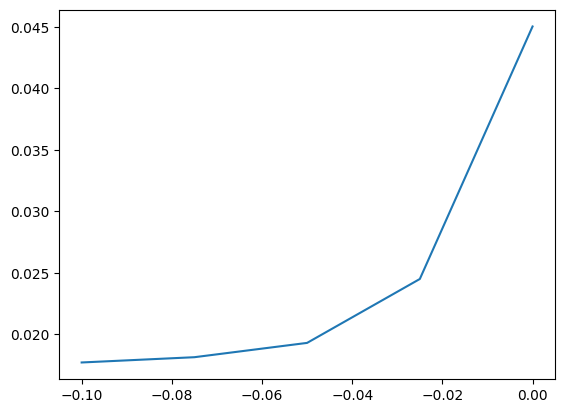

In [18]:
plt.plot(range_a, list_fc_corr)
idx_max = np.argmax(np.array(list_fc_corr))
best_a = range_a[idx_max]
print(f"Best a between {a_min} and {a_max} is at {best_a}.")
print(f"Best correlation is: {max(list_fc_corr)}")

What is the a that maximizes the fit to the empirical data? Write down your answer:

Best a =


Now plot the empirical and simulated functional connectivities. Are they very similar or not? Why do you think so?

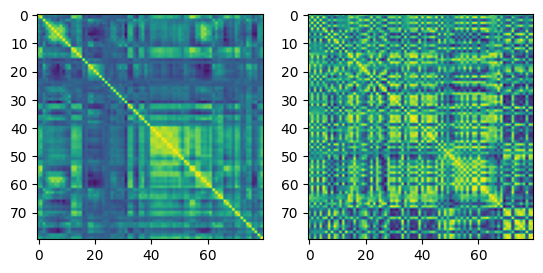

In [21]:
# Your code here
plt.subplot(121)
plt.imshow(fc_emp)
plt.subplot(122)
plt.imshow(list_fc_sim[idx_max])

## More advanced fitting

With Neurolib you can do some more advance fitting... This is not needed for our purposes, but if you are interested and you want to play around with it, you are more than welcome to do so! For example, using Neurolib you can run many simulations in parallel, which considerably speeds up the time and allows you to test out many more parameter combinations. Additionally, you can also use other methods rather than a grid search... Take a look at [this tutorial](https://github.com/neurolib-dev/neurolib/blob/master/examples/example-1.2-brain-network-exploration.ipynb) and [this one](https://github.com/neurolib-dev/neurolib/blob/master/examples/example-2-evolutionary-optimization-minimal.ipynb).